In [31]:
import pandas as pd

file_path = "C:\\Users\\Kunle Kuforiji\\OneDrive\Documents\\Country factbook.csv backup.csv"
data = pd.read_csv(file_path)
data.head()

C:\Users\Kunle Kuforiji\AppData\Local\Temp\ipykernel_20904\3410314635.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,#European Union,"3,976,372.00",10.10,NaN,10.10,NaN,"2,661,000,000,000.00","2,888,000,000,000.00","1,109,000,000,000.00","11,650,000,000,000.00",...,"2,648,000.00","28,210,000,000.00","457,030,418.00",NaN,"222,293.00",NaN,"238,763,162.00","314,644,700.00",1.48,9.50
1,Afghanistan,"647,500.00",47.02,NaN,20.75,"8,000,000,000.00","652,200,000.00","540,000,000.00","446,000,000.00","21,500,000,000.00",...,-,-,"29,928,987.00",NaN,NaN,NaN,"33,100.00","15,000.00",6.75,NaN
2,Akrotiri,123.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"28,748.00",15.08,"-504,000,000.00",5.12,"1,410,000,000.00","6,760,000,000.00","5,680,000,000.00","552,400,000.00","17,460,000,000.00",...,"2,000.00","185,500,000.00","3,563,112.00",NaN,447.00,"1,206,000,000.00","255,000.00","1,100,000.00",2.04,14.80
4,Algeria,"2,381,740.00",17.13,"11,900,000,000.00",4.60,"21,900,000,000.00","23,610,000,000.00","25,760,000,000.00","32,160,000,000.00","212,300,000,000.00",...,"1,200,000.00","11,870,000,000.00","32,531,853.00",37.40,"3,973.00","43,550,000,000.00","2,199,600.00","1,447,310.00",1.92,25.40


In [9]:

data_cleaned = data.iloc[1:].copy()  
numeric_columns = [
    'Area(sq km)', 'Birth rate(births/1000 population)', 'Current account balance',
    'Death rate(deaths/1000 population)', 'Debt - external', 'GDP',
    'Population', 'Public debt(% of GDP)', 'Unemployment rate(%)'
]

for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

columns_of_interest = ['GDP', 'Current account balance', 'Debt - external', 'Public debt(% of GDP)', 'Unemployment rate(%)']
data_analysis = data_cleaned.dropna(subset=columns_of_interest)


data_analysis[columns_of_interest].describe()


,GDP,Current account balance,Debt - external,Public debt(% of GDP),Unemployment rate(%)
count,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,48.000000
mean,4.675095e+11,8.532407e+09,5.143312e+10,48.631250,13.045833
std,1.142242e+12,1.178725e+10,7.946048e+10,27.299273,9.375159
min,7.966000e+09,7.185000e+07,0.000000e+00,2.100000,0.600000
25%,4.789750e+10,5.550500e+08,5.775000e+09,29.525000,6.575000
50%,1.601500e+11,4.092000e+09,1.968500e+10,44.250000,11.000000
75%,3.240500e+11,1.150250e+10,5.389500e+10,61.775000,15.500000
max,7.262000e+12,5.150000e+10,4.176000e+11,118.000000,40.000000


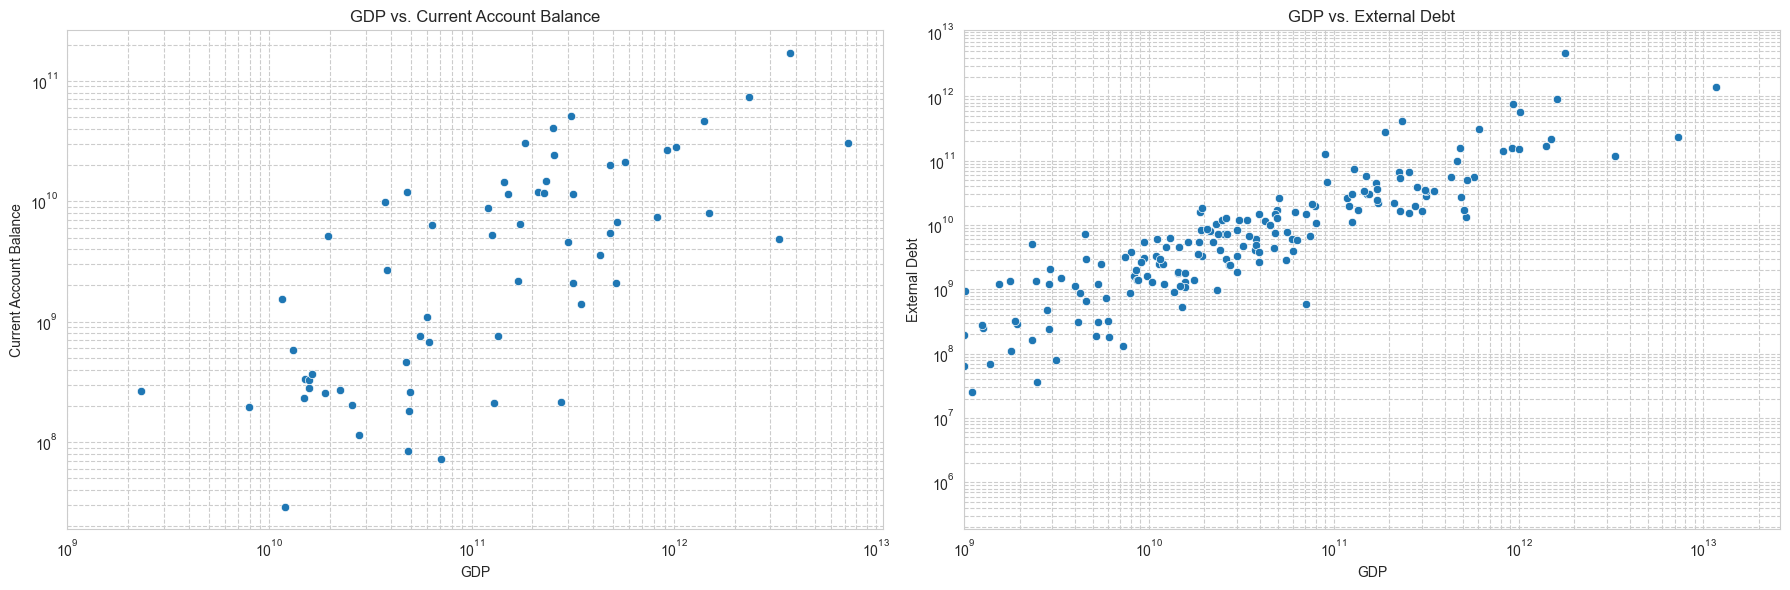

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x='GDP', y='Current account balance', data=data_cleaned, ax=ax[0])
ax[0].set_title('GDP vs. Current Account Balance')
ax[0].set_xlabel('GDP')
ax[0].set_ylabel('Current Account Balance')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(left=1e9)
ax[0].grid(True, which="both", ls="--")

sns.scatterplot(x='GDP', y='Debt - external', data=data_cleaned, ax=ax[1])
ax[1].set_title('GDP vs. External Debt')
ax[1].set_xlabel('GDP')
ax[1].set_ylabel('External Debt')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(left=1e9)
ax[1].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


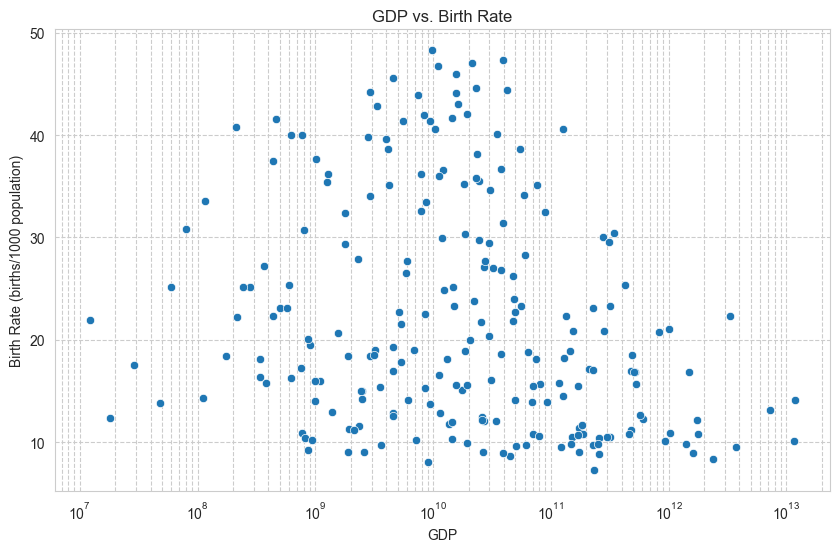

In [18]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Birth rate(births/1000 population)', data=data_cleaned)
plt.title('GDP vs. Birth Rate')
plt.xlabel('GDP')
plt.ylabel('Birth Rate (births/1000 population)')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.show()
